In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
google = pd.read_csv('googleplaystore.csv')
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### DATA CLEANING

In [4]:
google['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

<AxesSubplot:>

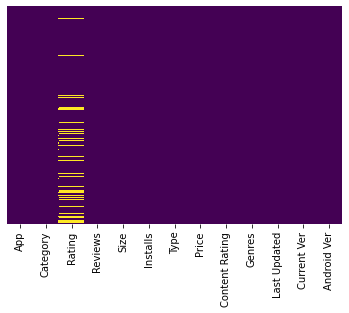

In [5]:
sns.heatmap(google.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

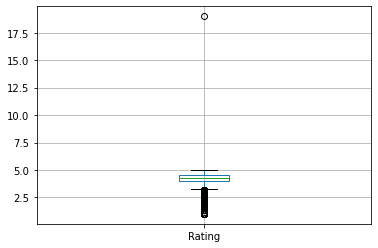

In [6]:
google.boxplot()

In [7]:
google['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [8]:
google[google['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<AxesSubplot:>

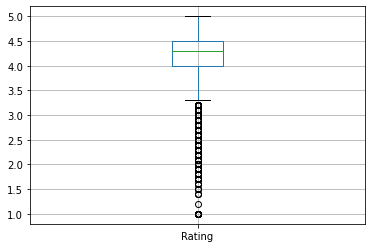

In [9]:
google.drop([10472], inplace=True)
google.boxplot()

In [10]:
x = google.groupby('Category')
y = x['Rating'].agg(np.mean)
print(y)

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [11]:
d = y.to_dict()
d

{'ART_AND_DESIGN': 4.358064516129031,
 'AUTO_AND_VEHICLES': 4.19041095890411,
 'BEAUTY': 4.278571428571428,
 'BOOKS_AND_REFERENCE': 4.346067415730338,
 'BUSINESS': 4.121452145214522,
 'COMICS': 4.155172413793104,
 'COMMUNICATION': 4.158536585365852,
 'DATING': 3.9707692307692306,
 'EDUCATION': 4.389032258064517,
 'ENTERTAINMENT': 4.126174496644294,
 'EVENTS': 4.435555555555557,
 'FAMILY': 4.192272467086437,
 'FINANCE': 4.131888544891644,
 'FOOD_AND_DRINK': 4.1669724770642205,
 'GAME': 4.2863263445761195,
 'HEALTH_AND_FITNESS': 4.2771043771043775,
 'HOUSE_AND_HOME': 4.197368421052633,
 'LIBRARIES_AND_DEMO': 4.178461538461538,
 'LIFESTYLE': 4.094904458598724,
 'MAPS_AND_NAVIGATION': 4.051612903225806,
 'MEDICAL': 4.18914285714286,
 'NEWS_AND_MAGAZINES': 4.1321888412017165,
 'PARENTING': 4.300000000000001,
 'PERSONALIZATION': 4.335987261146501,
 'PHOTOGRAPHY': 4.192113564668767,
 'PRODUCTIVITY': 4.211396011396012,
 'SHOPPING': 4.259663865546221,
 'SOCIAL': 4.255598455598457,
 'SPORTS': 4.

In [12]:
type(d)

dict

In [13]:
rating_count = google['Rating'].value_counts()
rating_count

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
2.1       8
1.8       8
1.7       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

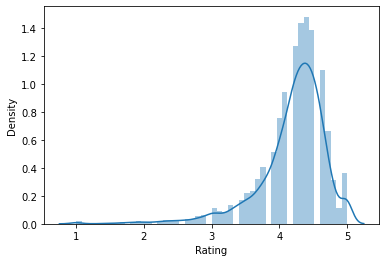

In [14]:
sns.distplot(google['Rating'])

In [15]:
#Fill in missing values with the median of the rating column
def inpute_rating(col):
    return col.fillna(col.median())

In [16]:
google['Rating'] = google['Rating'].transform(inpute_rating)

In [17]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [18]:
#Fill in type, current version & Andriod version columns with their mode
google['Type'].fillna(str(google['Type'].mode().values[0]), inplace=True)
google['Current Ver'].fillna(str(google['Current Ver'].mode().values[0]), inplace=True)
google['Android Ver'].fillna(str(google['Android Ver'].mode().values[0]), inplace=True)

In [19]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [20]:
#Convert some categorical columns to numeric
google['Price'] = google['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google['Price'] = google['Price'].apply(lambda x: float(x))
google['Reviews'] = pd.to_numeric(google['Reviews'], errors='coerce')

In [21]:
google['Installs'] = google['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google['Installs'] = google['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google['Installs'] = google['Installs'].apply(lambda x: float(x))

In [22]:
google.head(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [23]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


### VISUALIZATIONS

<AxesSubplot:xlabel='Rating', ylabel='Category'>

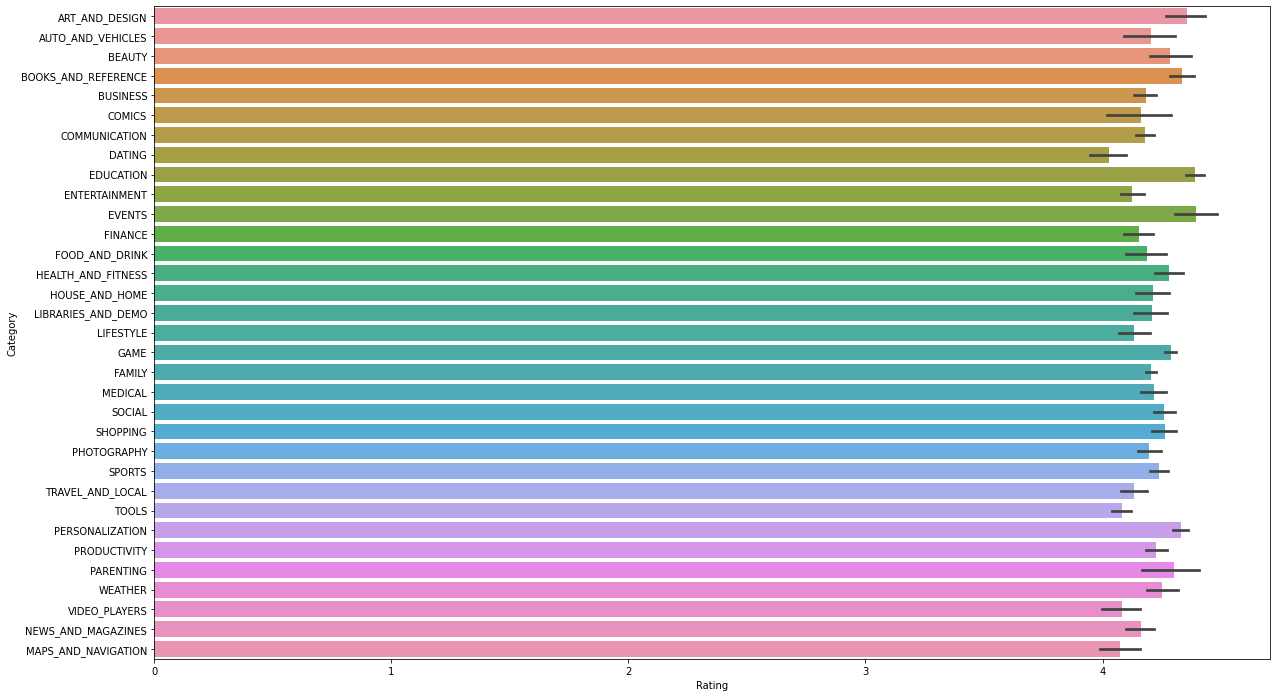

In [24]:
plt.figure(figsize=(20, 12))
sns.barplot(x='Rating', y='Category', data=google) #Categories based on Ratings

<AxesSubplot:xlabel='Price', ylabel='Category'>

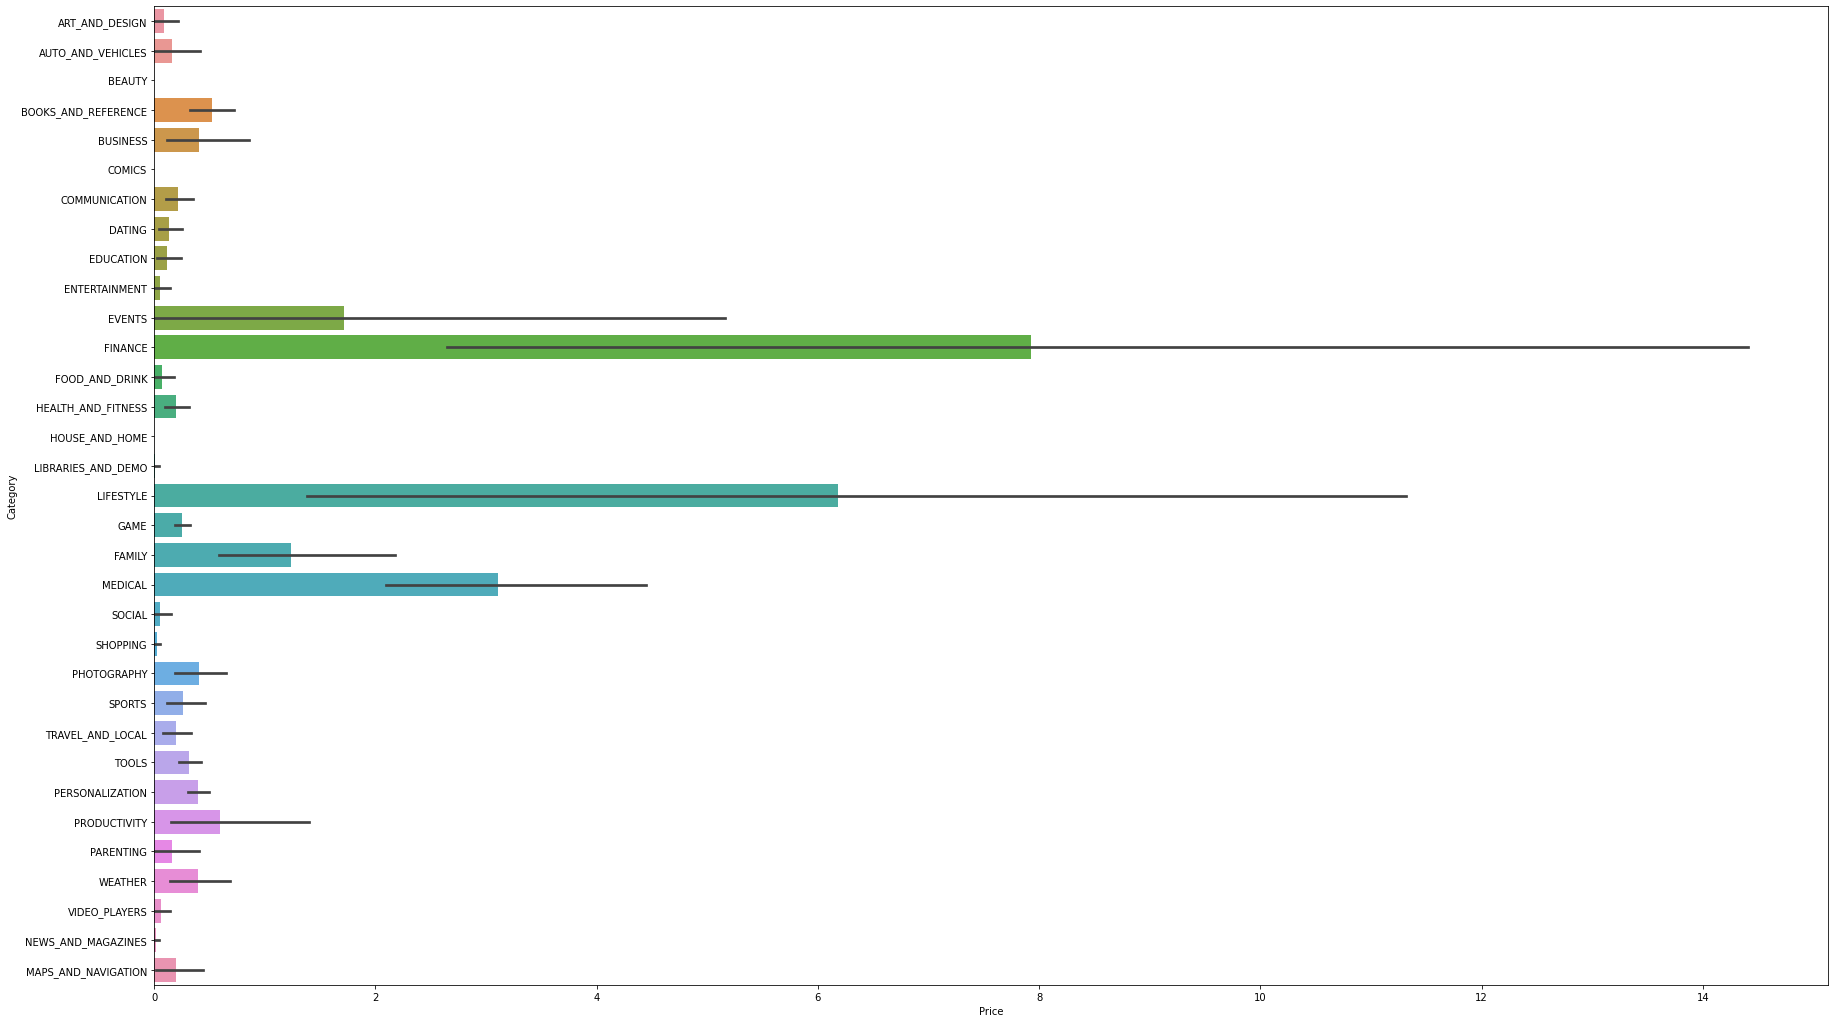

In [25]:
plt.figure(figsize=(30, 18))
sns.barplot(x='Price', y='Category', data=google) #Category based on Price

<AxesSubplot:xlabel='Installs', ylabel='Category'>

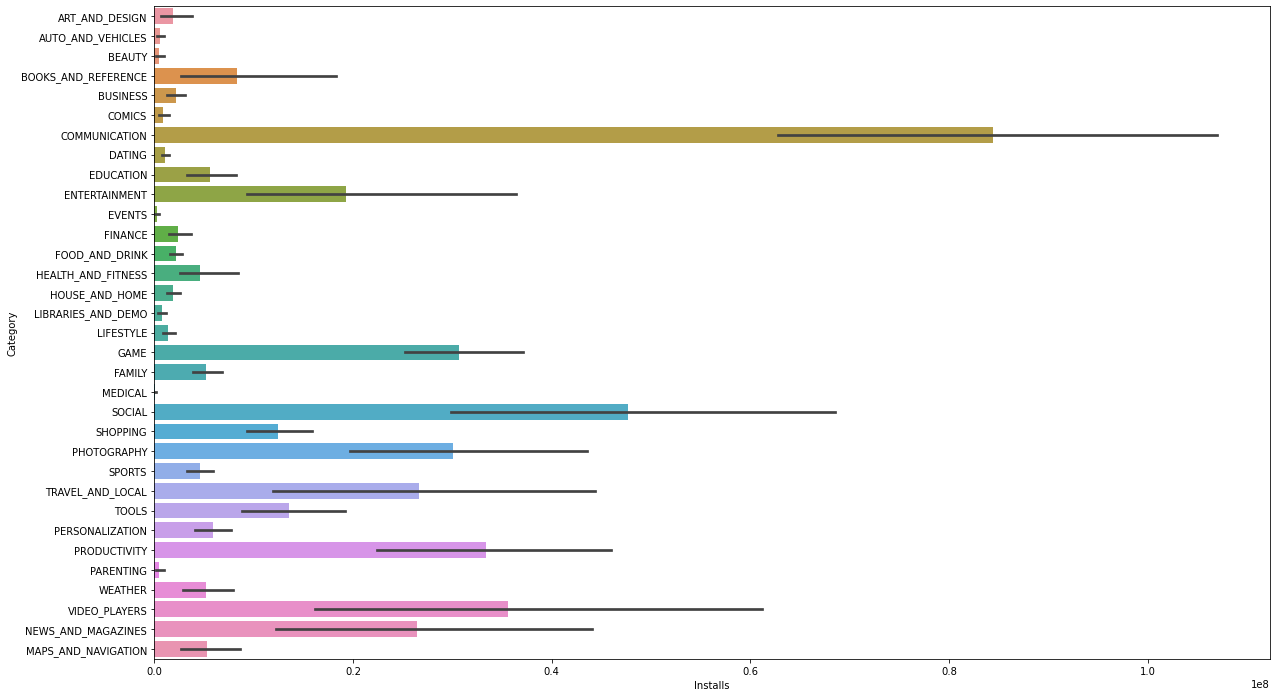

In [26]:
plt.figure(figsize=(20, 12))
sns.barplot(x='Installs', y='Category', data=google) #Category based on installs

<AxesSubplot:>

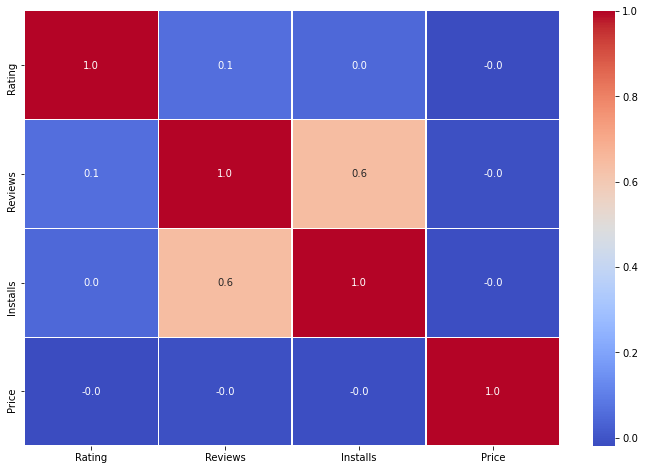

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(google.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)